In [71]:
!pip install imutils --quiet
!pip install gdown --quiet
import tensorflow as tf 
from tensorflow import keras 
import gdown
import os 
import shutil 
from tqdm import tqdm 
import glob 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from imutils import paths
import cv2
from PIL import Image

In [74]:
LOL_DATA_URL = 'https://drive.google.com/uc?id=1DdGIJ4PZPlF2ikl8mNM9V-PdVxVLbQi6'
DATA_PATH = "lol_dataset/"
TRAIN_DATA_PATH = DATA_PATH + "our485/"
VAL_DATA_PATH = DATA_PATH + "eval15/"
LL_TRAIN_DATA_PATH = TRAIN_DATA_PATH + "low/"
HL_TRAIN_DATA_PATH = TRAIN_DATA_PATH + "high/"
LL_VAL_DATA_PATH = VAL_DATA_PATH + "low/"
HL_VAL_DATA_PATH = VAL_DATA_PATH + "high/"
IMG_SIZE = 128

In [9]:
gdown.download(LOL_DATA_URL, quiet=True)

'lol_dataset.zip'

In [ ]:
!unzip lol_dataset.zip

In [13]:
data_dirs = os.listdir("lol_dataset")

['our485', 'eval15']

In [75]:
ll_train_image_files = list(paths.list_images(LL_TRAIN_DATA_PATH))
hl_train_image_files = list(paths.list_images(HL_TRAIN_DATA_PATH))

In [76]:
#print(ll_train_image_files[: 5])
print("Number of low light training Samples: ", len(ll_train_image_files))

#print(hl_train_image_files[: 5])
print("Number of high light training Samples: ", len(hl_train_image_files))

Number of low light training Samples:  485
Number of high light training Samples:  485


In [77]:
ll_val_image_files = list(paths.list_images(LL_VAL_DATA_PATH))
hl_val_image_files = list(paths.list_images(HL_VAL_DATA_PATH))

In [78]:
#print(ll_val_image_files[: 5])
print("Number of low light validation Samples: ", len(ll_val_image_files))

#print(hl_val_image_files[: 5])
print("Number of high light validation Samples: ", len(hl_val_image_files))

Number of low light validation Samples:  15
Number of high light validation Samples:  15


In [79]:
def load_image(img_path, img_size):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    return img

In [82]:
img = load_image(hl_val_image_files[0], 128)

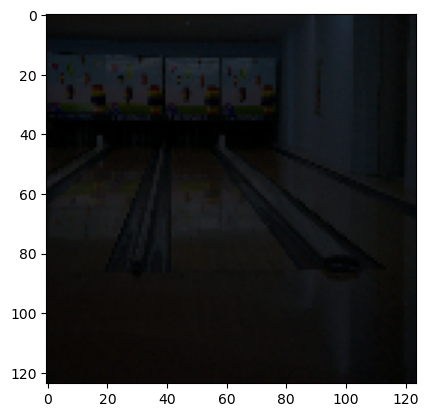

In [81]:
plt.imshow(img)

In [83]:
def create_dataset(files, img_size):
    data = []
    
    for file in files:
        img = load_image(file, img_size)
        data.append(img)
        
    return np.array(data)

In [84]:
ll_train_ds = create_dataset(ll_train_image_files, IMG_SIZE)
hl_train_ds = create_dataset(hl_train_image_files, IMG_SIZE)

print(ll_train_ds.shape)
print(hl_train_ds.shape)

(485, 128, 128, 3)
(485, 128, 128, 3)


In [85]:
ll_val_ds = create_dataset(ll_val_image_files, IMG_SIZE)
hl_val_ds = create_dataset(hl_val_image_files, IMG_SIZE)

print(ll_val_ds.shape)
print(hl_val_ds.shape)

(15, 128, 128, 3)
(15, 128, 128, 3)


In [87]:
# Training Dataset

def plot_images(ll_arr, hl_arr, n_plot):
    for indx in range(n_plot):
        plt.figure(figsize=(20, 20))

        plt.subplot(121)
        plt.title("Low Resolution Image")
        plt.imshow(ll_arr[indx])

        plt.subplot(122)
        plt.title("High Resolution Image")
        plt.imshow(hl_arr[indx])

    plt.show()

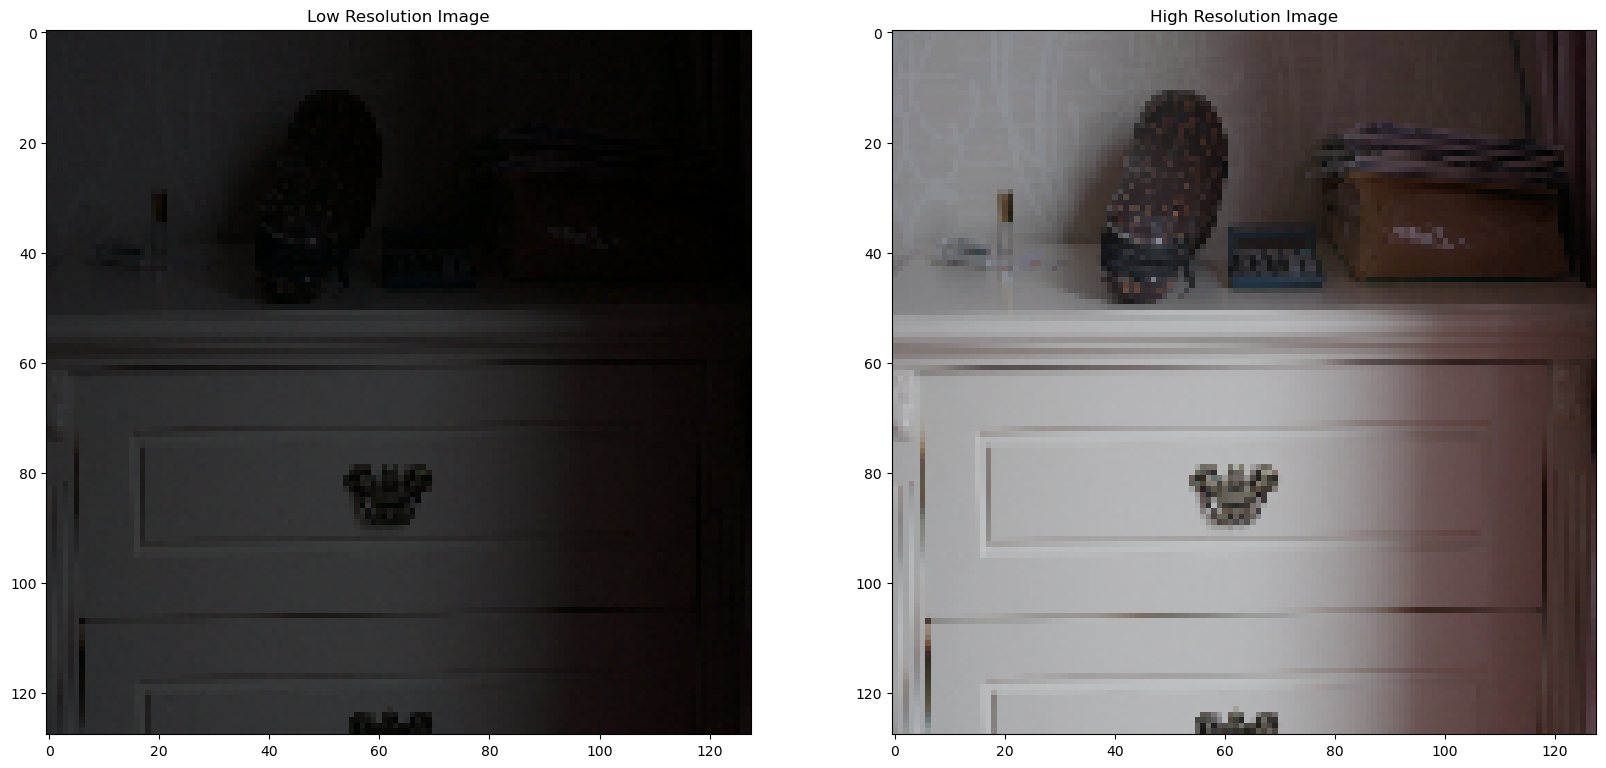

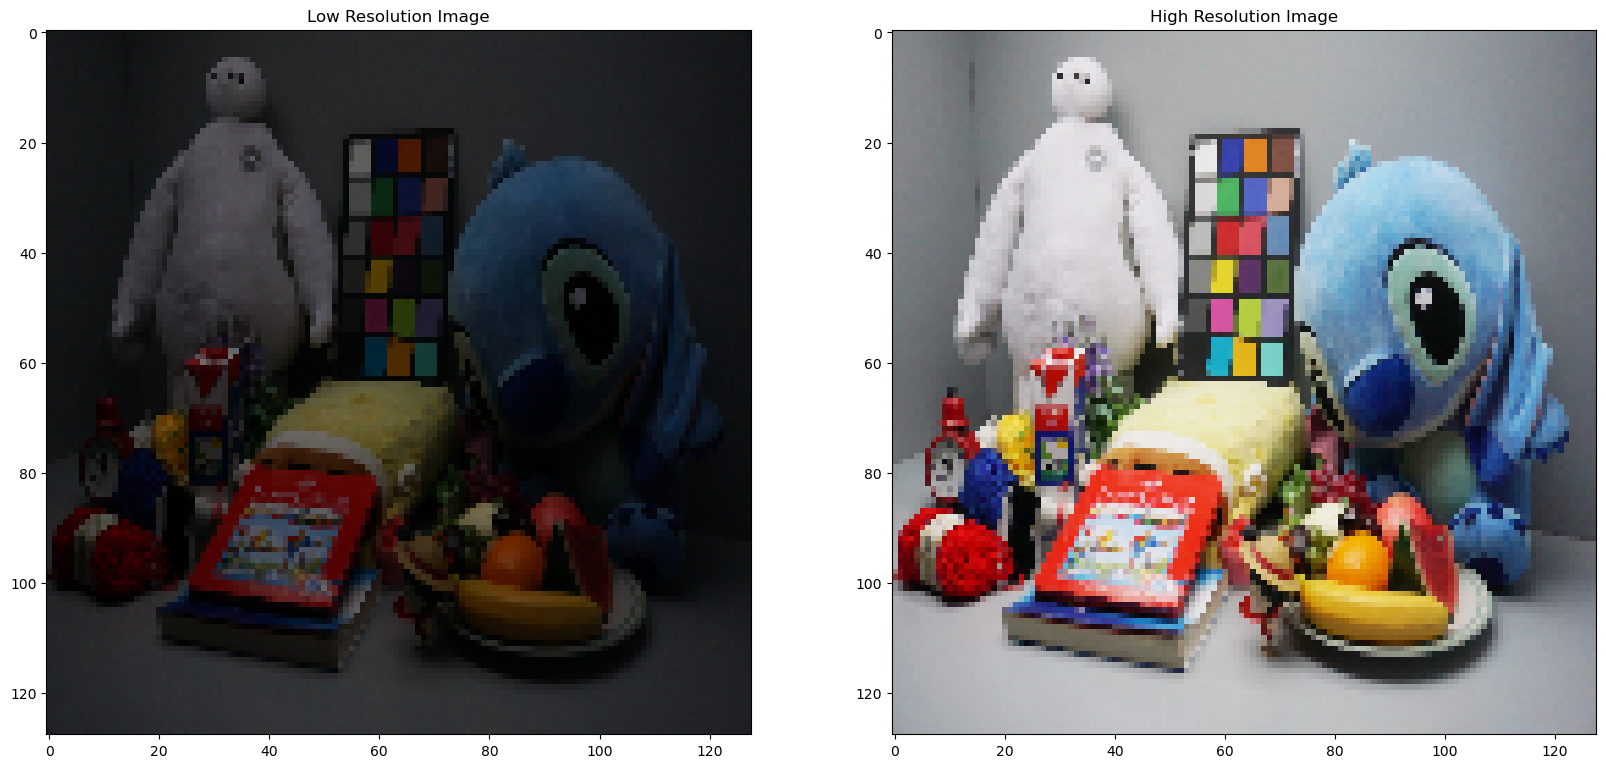

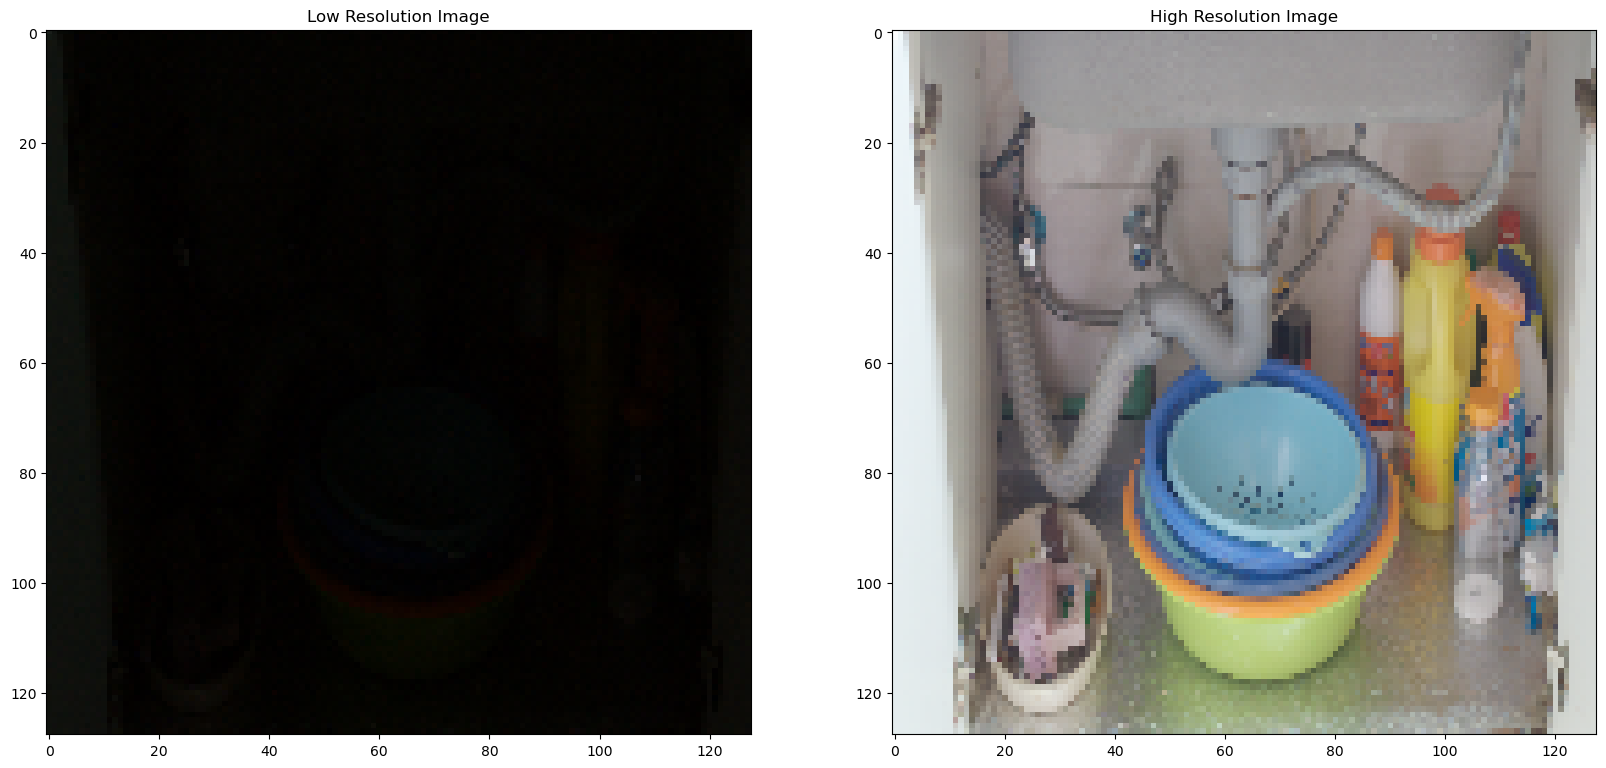

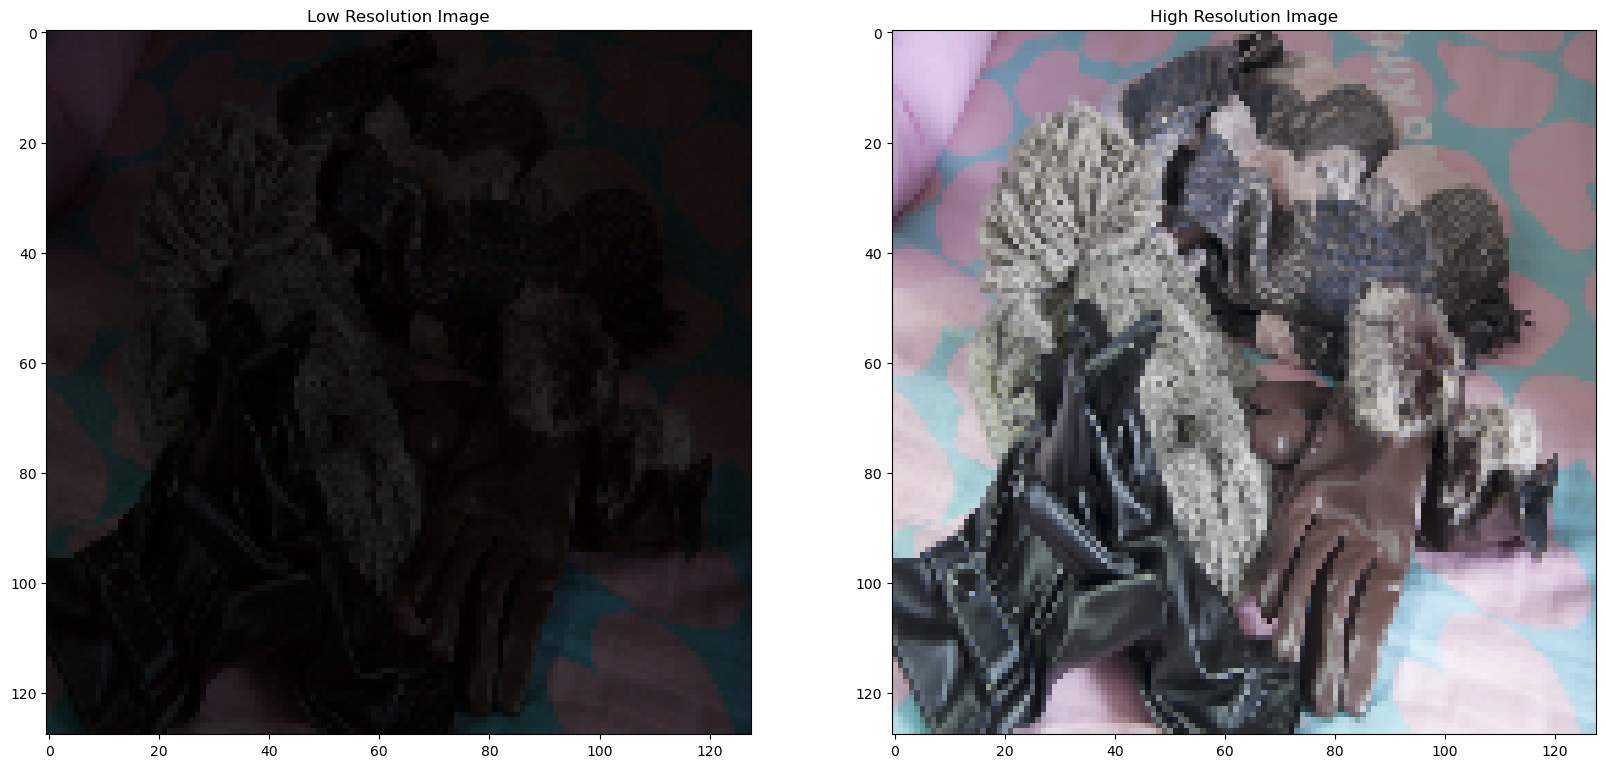

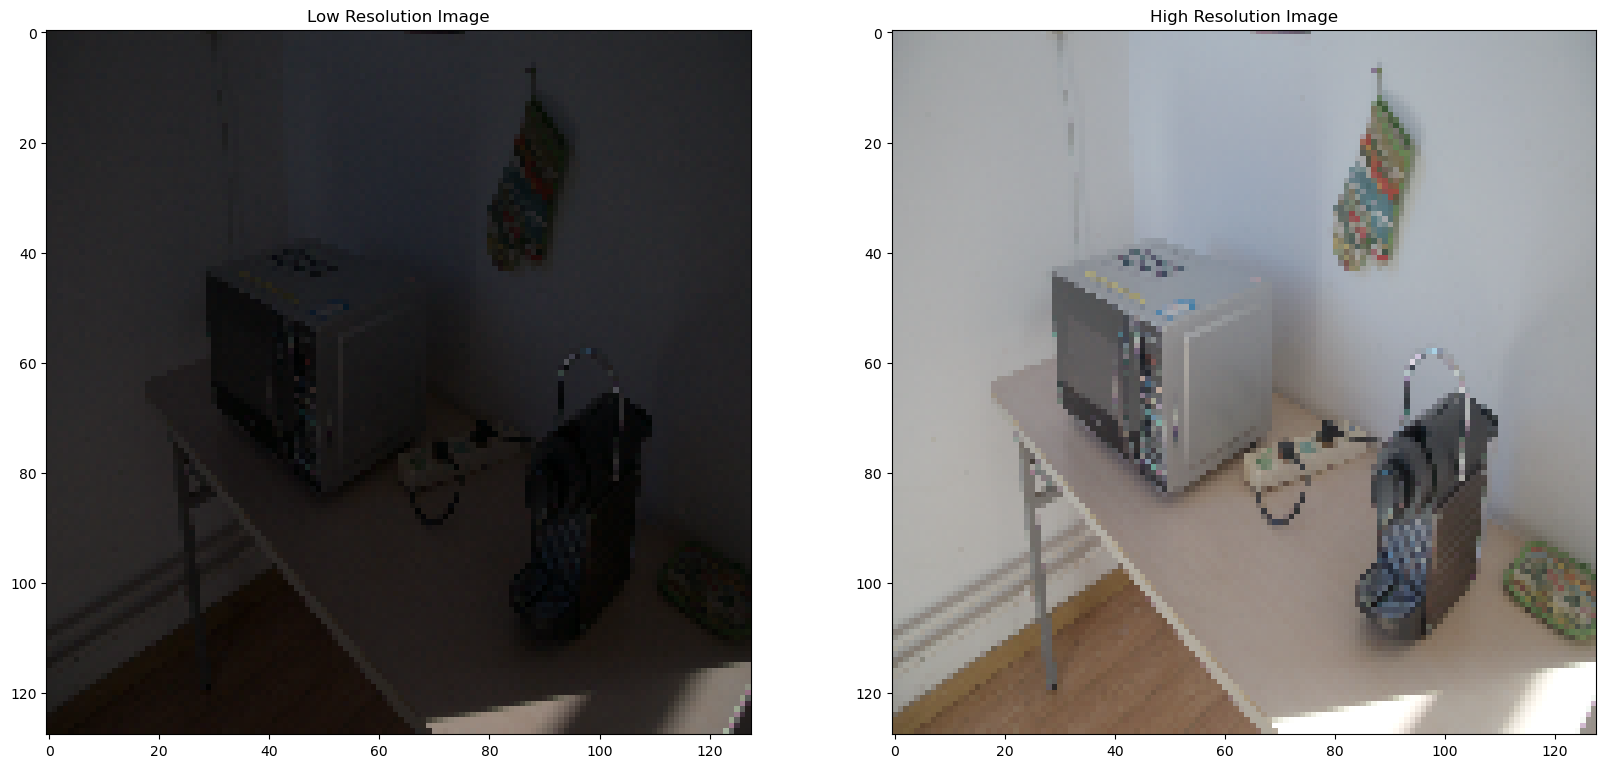

In [88]:
plot_images(ll_train_ds, hl_train_ds, 5)

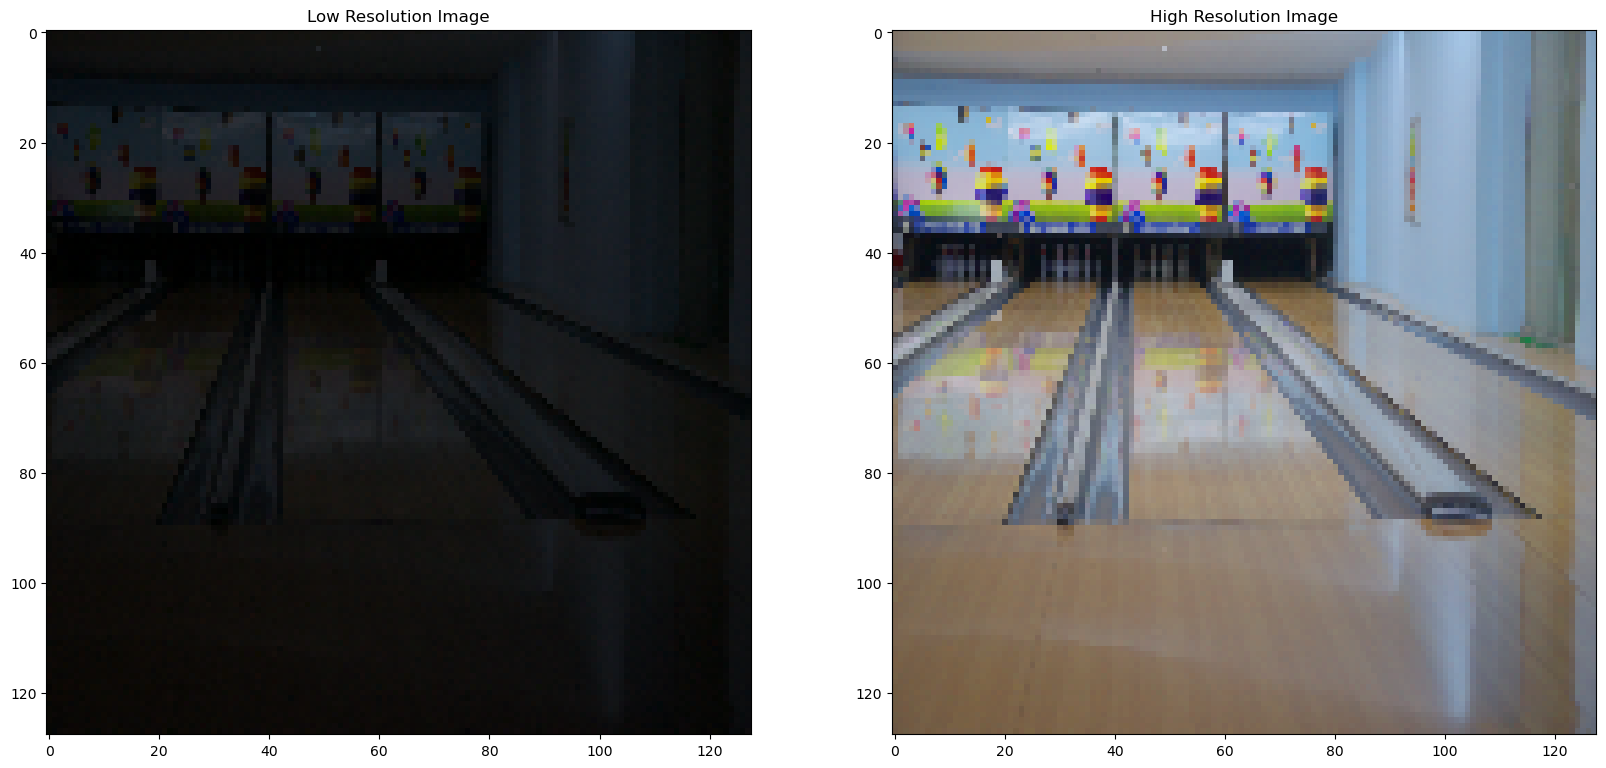

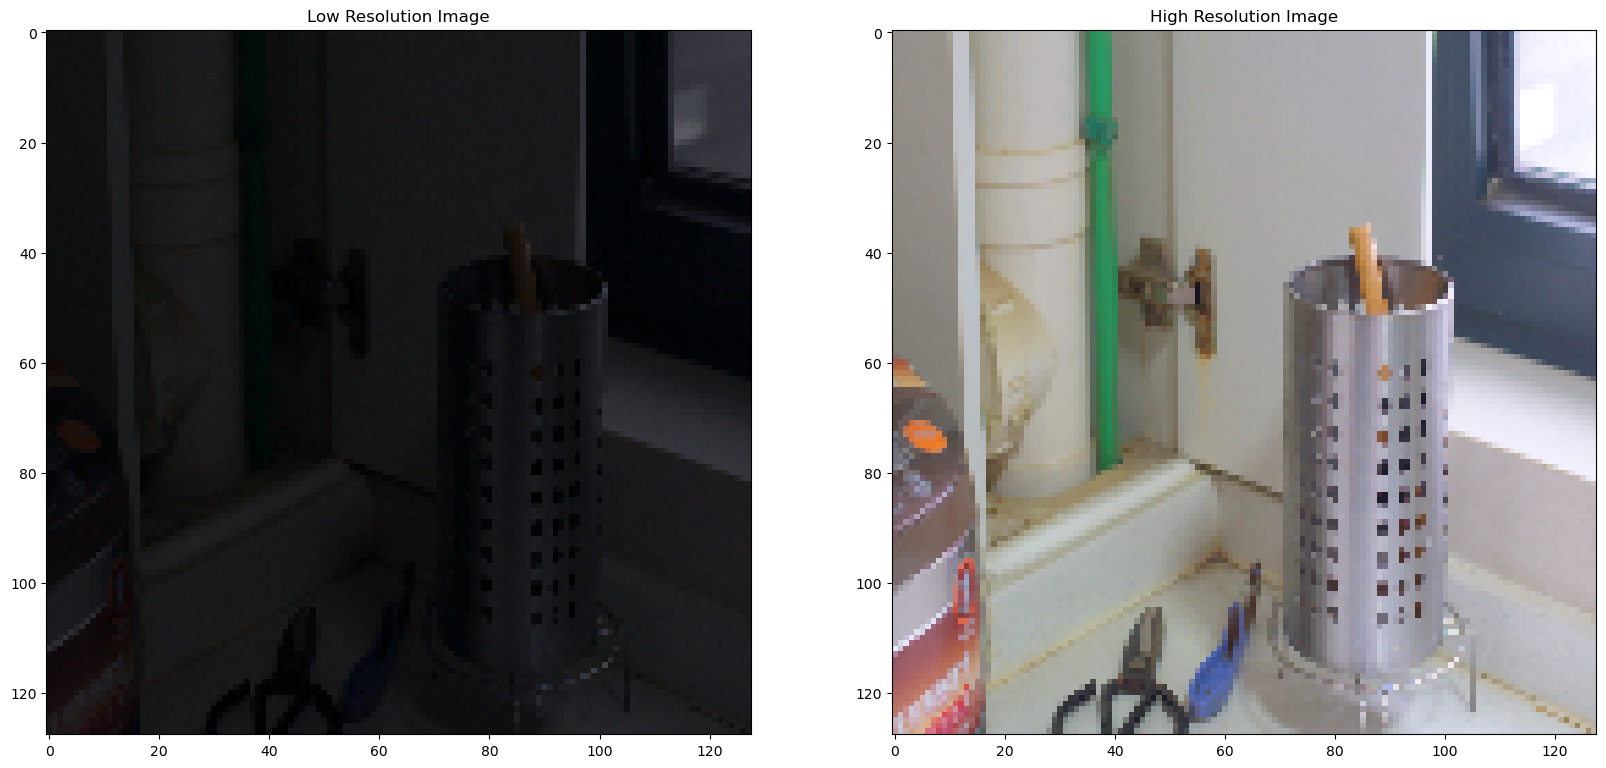

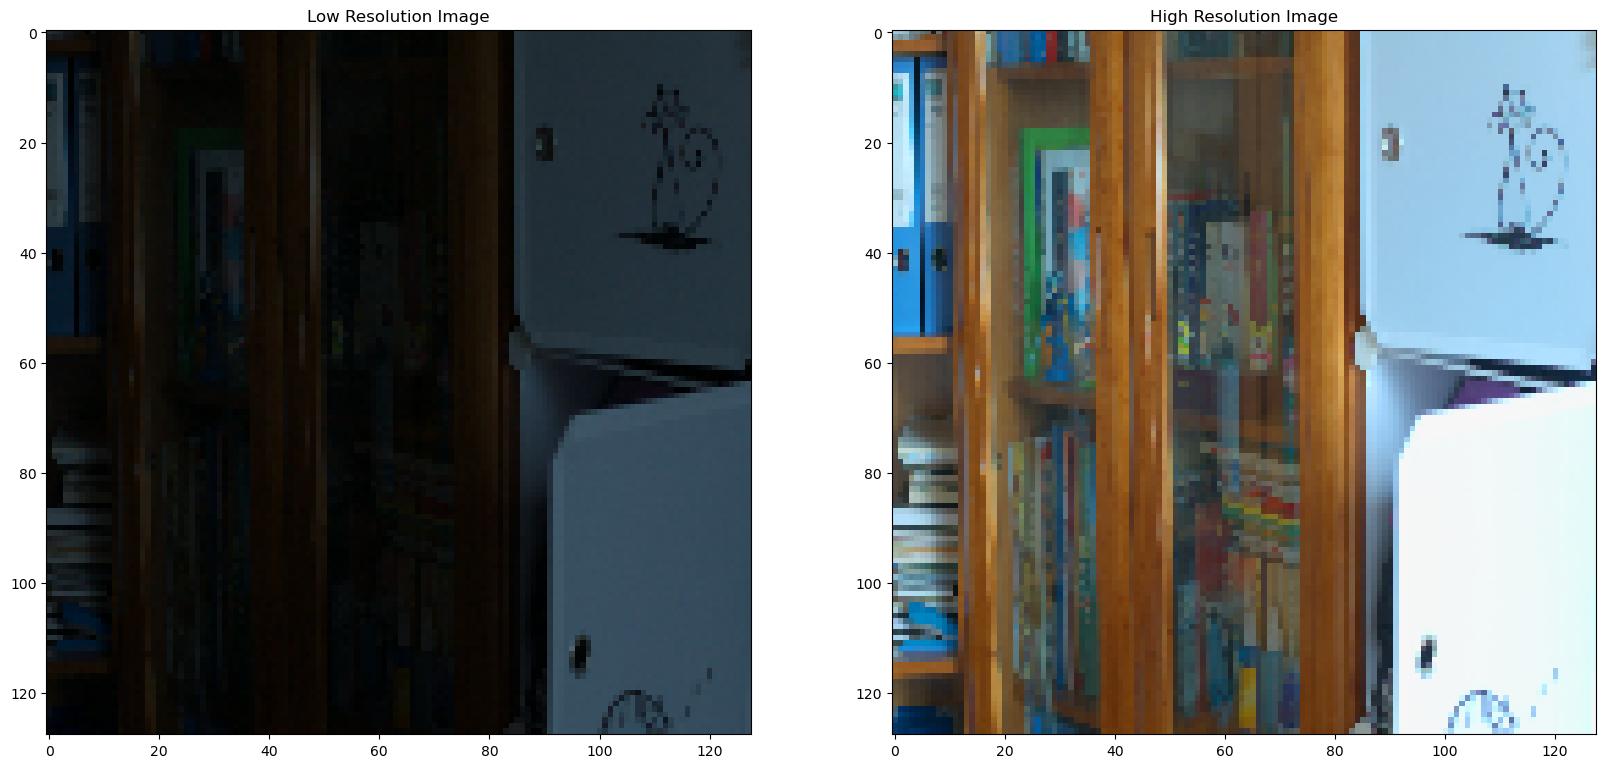

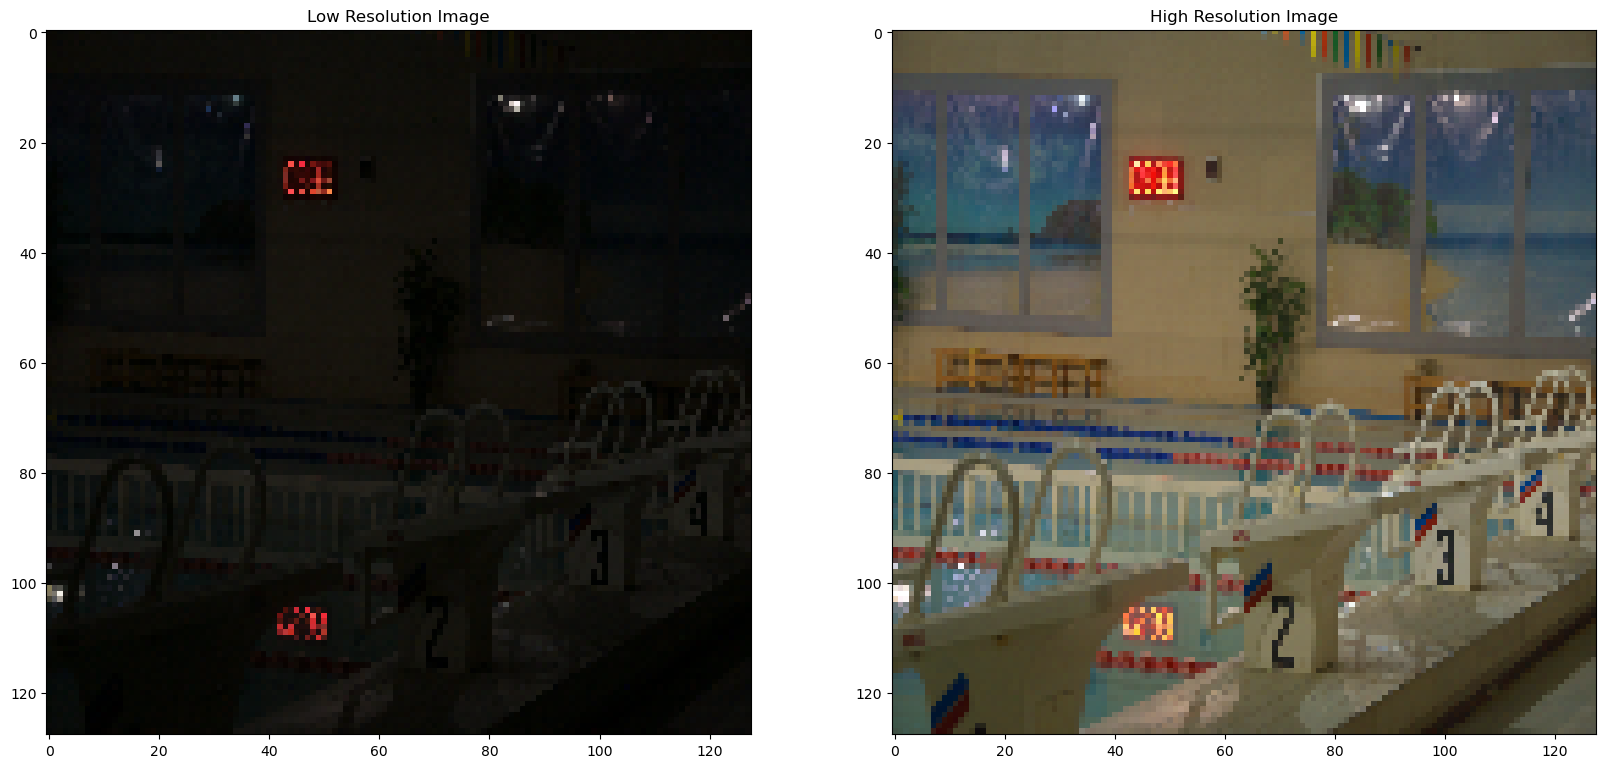

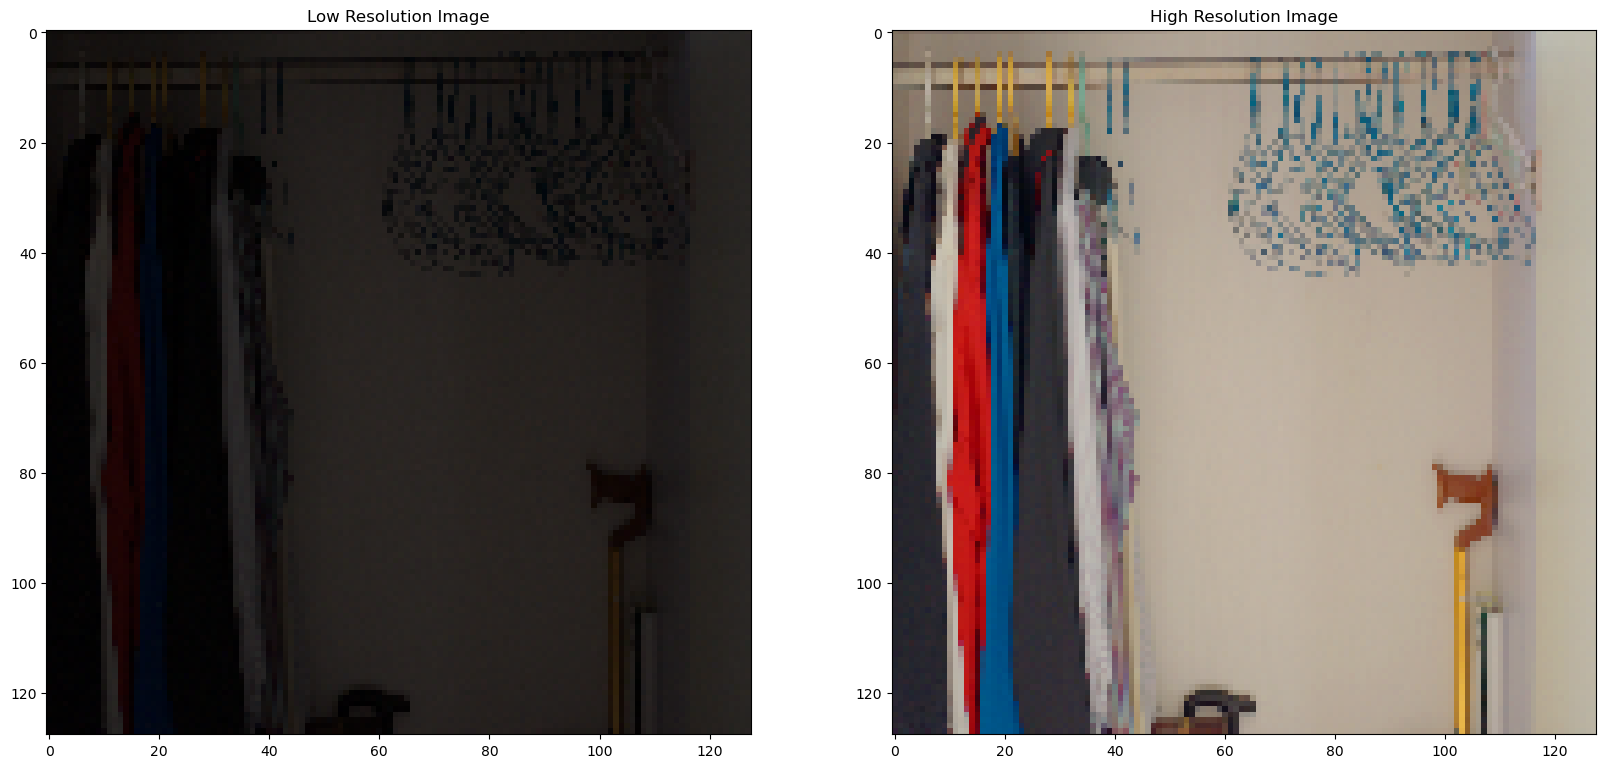

In [89]:
# val data 
plot_images(ll_val_ds, hl_val_ds, 5)